In [1]:
# #Mount your drive
# from google.colab import drive
# drive.mount('/content/drive')

# Code

1.   Load the MNIST dataset as in Homework 1.
Filter the dataset into a subset that contains only the '3' and '9' images.

2.   Implement and run the kMeans algorithm on this subset with k = 2, 3, 5, 10.

3.   Reduce the dimensionality of the raw '3' and '9' images of the subset from 784 to eigenspaces 2, 5 and 10 dimensions (that is, you will have 3 new datasets). Implement and run the kMeans algorithm on these new subsets with k = 2, 3, 5, 10.

In total, you'd run your kMeans 16 times.

In [2]:
# Code here
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt
import urllib.request
from numpy.random import uniform
from sklearn.decomposition import PCA

In [3]:
def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)

    copied from http://deeplearning.net/ and revised by hchoi
    '''

    # Download the MNIST dataset if it is not present
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.
    print('... data has been loaded!')
    return train_set, valid_set, test_set

In [4]:
#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

#Separate each set into image vector (_x) and label (_y)
train_x, train_y = train_set
val_x, val_y = val_set
test_x, test_y = test_set

Loading data...
... data has been loaded!


In [5]:
#Filter dataset into subset that contain only '3' and '9' images
train_filter = np.where((train_y == 3 ) | (train_y == 9))
test_filter = np.where((test_y == 3) | (test_y == 9))

train_x, train_y = train_x[train_filter], train_y[train_filter]
test_x, test_y = test_x[test_filter], test_y[test_filter]

print(train_x.shape)
print(train_y.shape)

(10089, 784)
(10089,)


In [6]:
def kMeans(X, k, iter):

    centroids = X[np.random.choice(X.shape[0] , size = k, replace=False)] #centroid initialization
    # (k, 784)

    for _ in range(iter):

        # X[:, np.newaxis] (10098, 1, 784)
        EucDistances = np.linalg.norm(X[:, np.newaxis] - centroids, axis = 2) #Calculate Euclidean Distance; (10098, k, 784)
        labels = np.argmin(EucDistances, axis=1) #Extract the label

        newCentroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # checks for convergence
        if np.all(centroids == newCentroids):
          print("converges")
          break

        centroids = newCentroids

    return centroids, labels

In [7]:
# No plot
kVal = [2, 3, 5, 10 ]

for k in kVal:
    centroids, labels = kMeans(train_x, k, 1000)
    print("K means", k)

    for cluster in range(k):
        cluster_size = np.sum(labels == cluster)
        print(f"Cluster {cluster}: Size = {cluster_size}")

converges
K means 2
Cluster 0: Size = 4652
Cluster 1: Size = 5437
converges
K means 3
Cluster 0: Size = 5232
Cluster 1: Size = 2097
Cluster 2: Size = 2760
converges
K means 5
Cluster 0: Size = 1379
Cluster 1: Size = 2071
Cluster 2: Size = 2532
Cluster 3: Size = 1978
Cluster 4: Size = 2129
converges
K means 10
Cluster 0: Size = 998
Cluster 1: Size = 911
Cluster 2: Size = 882
Cluster 3: Size = 990
Cluster 4: Size = 876
Cluster 5: Size = 1043
Cluster 6: Size = 1166
Cluster 7: Size = 896
Cluster 8: Size = 1256
Cluster 9: Size = 1071


converges
K means 2
Cluster 0: Size = 4653
Cluster 1: Size = 5436


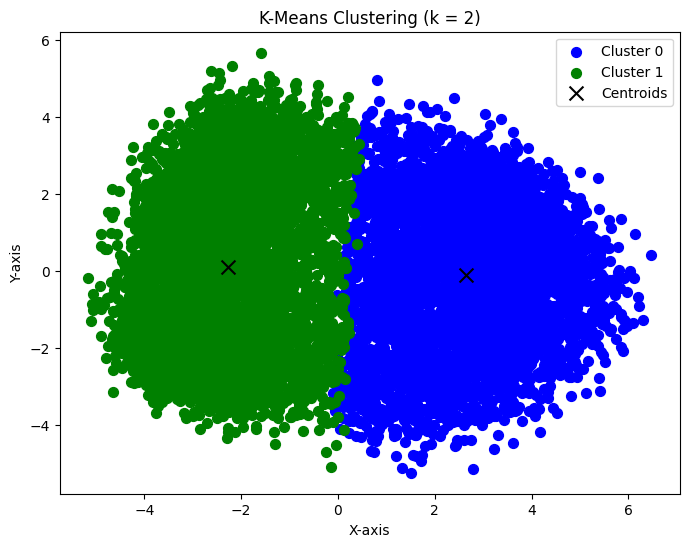

converges
K means 3
Cluster 0: Size = 4518
Cluster 1: Size = 2637
Cluster 2: Size = 2934


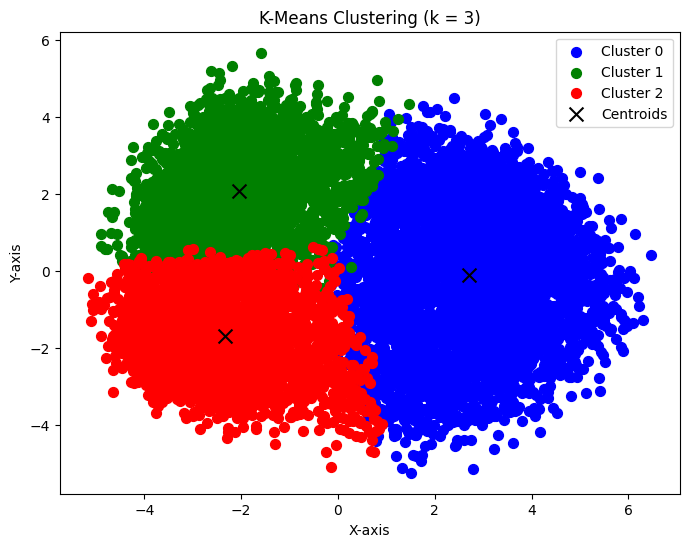

converges
K means 5
Cluster 0: Size = 1640
Cluster 1: Size = 1625
Cluster 2: Size = 1733
Cluster 3: Size = 2740
Cluster 4: Size = 2351


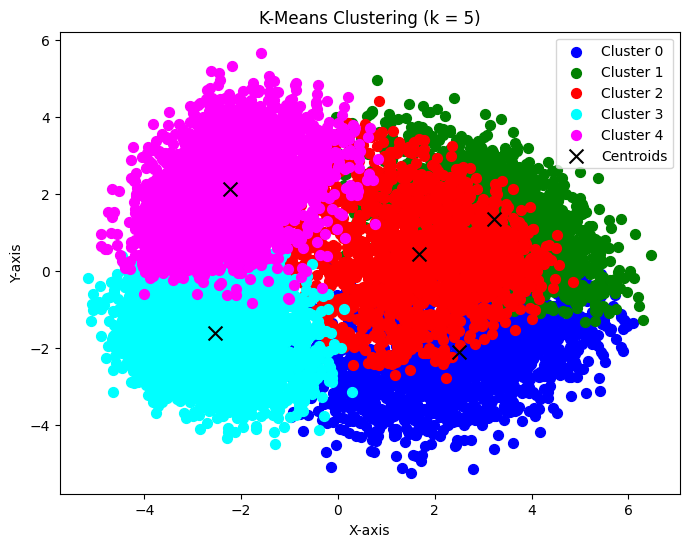

converges
K means 10
Cluster 0: Size = 895
Cluster 1: Size = 1076
Cluster 2: Size = 789
Cluster 3: Size = 879
Cluster 4: Size = 924
Cluster 5: Size = 1209
Cluster 6: Size = 1187
Cluster 7: Size = 1001
Cluster 8: Size = 1048
Cluster 9: Size = 1081


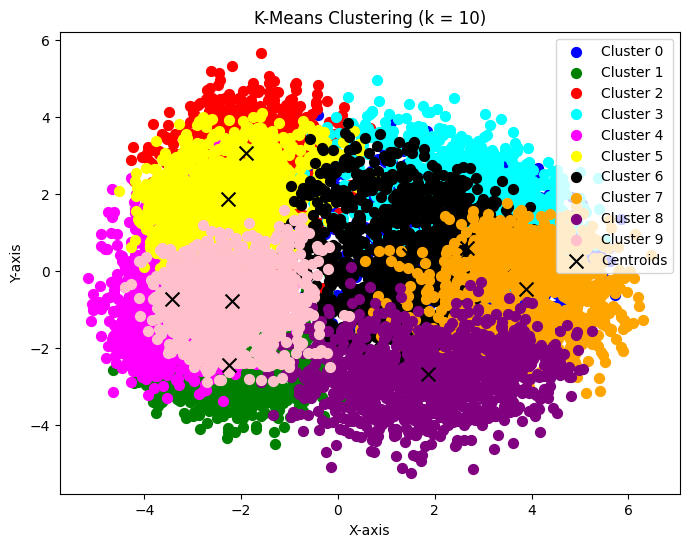

In [8]:
#DEBUG
#With ploting for just checking, using PCA

kVal = [2, 3, 5, 10 ]

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'pink']

kVal = [2, 3, 5, 10]

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_x)



for k in kVal:
    centroids, labels = kMeans(train_x, k, 1000)
    print("K means", k)

    plt.figure(figsize=(8, 6))
    plt.title(f"K-Means Clustering (k = {k})")

    for cluster in range(k):
        cluster_size = np.sum(labels == cluster)
        print(f"Cluster {cluster}: Size = {cluster_size}")

        cluster_samples = reduced_data[labels == cluster]
        plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], c=colors[cluster], label=f'Cluster {cluster}', s=50)

    reduced_centroids = pca.transform(centroids)
    plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='k', marker='x', s=100, label='Centroids')
    plt.legend()

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

In [9]:
#Reduce the dimensionality of the raw '3' and '9' images of the subset from 784 to eigenspaces 2, 5 and 10 dimensions

def reduceDim(X, dim):

  cov = np.cov(X.T)
  eigval, eigvec = np.linalg.eig(cov)

  reduceEigenvec = eigvec[:, :dim]
  reduceX = X.dot(reduceEigenvec)

  return reduceX

In [10]:
# No plot
kVal = [2, 3, 5, 10 ]
Dimensions = [2, 5, 10]

for dim in Dimensions:
  reduceX = reduceDim(train_x, dim)
  print(reduceX.shape)

  for k in kVal:

      centroids, labels = kMeans(reduceX, k, 1000)
      print("K means", k)

      for cluster in range(k):
          cluster_size = np.sum(labels == cluster)
          print(f"Cluster {cluster}: Size = {cluster_size}")

(10089, 2)
converges
K means 2
Cluster 0: Size = 5460
Cluster 1: Size = 4629
converges
K means 3
Cluster 0: Size = 4202
Cluster 1: Size = 2692
Cluster 2: Size = 3195
converges
K means 5
Cluster 0: Size = 2322
Cluster 1: Size = 2794
Cluster 2: Size = 1779
Cluster 3: Size = 1446
Cluster 4: Size = 1748
converges
K means 10
Cluster 0: Size = 805
Cluster 1: Size = 1102
Cluster 2: Size = 1259
Cluster 3: Size = 1368
Cluster 4: Size = 1081
Cluster 5: Size = 699
Cluster 6: Size = 900
Cluster 7: Size = 893
Cluster 8: Size = 847
Cluster 9: Size = 1135
(10089, 5)
converges
K means 2
Cluster 0: Size = 4632
Cluster 1: Size = 5457
converges
K means 3
Cluster 0: Size = 3023
Cluster 1: Size = 4501
Cluster 2: Size = 2565
converges
K means 5
Cluster 0: Size = 2167
Cluster 1: Size = 2115
Cluster 2: Size = 2315
Cluster 3: Size = 1487
Cluster 4: Size = 2005
converges
K means 10
Cluster 0: Size = 911
Cluster 1: Size = 1163
Cluster 2: Size = 963
Cluster 3: Size = 899
Cluster 4: Size = 1219
Cluster 5: Size = 1

(10089, 2)
converges
K means 2
Cluster 0: Size = 5459
Cluster 1: Size = 4630


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


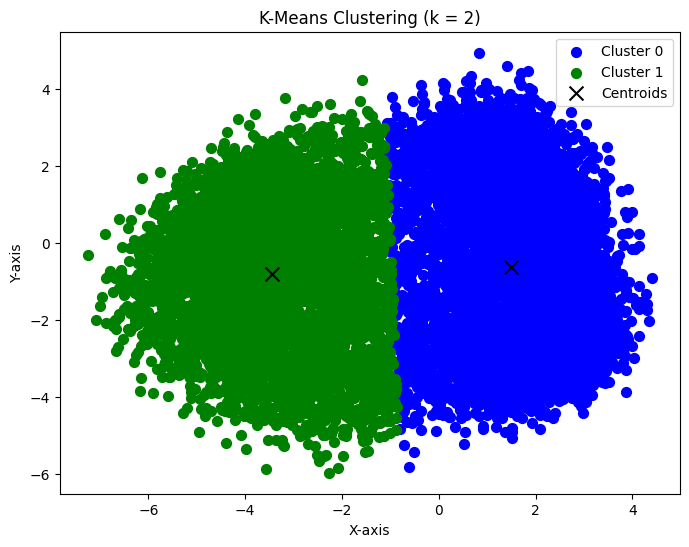

converges
K means 3
Cluster 0: Size = 3195
Cluster 1: Size = 2688
Cluster 2: Size = 4206


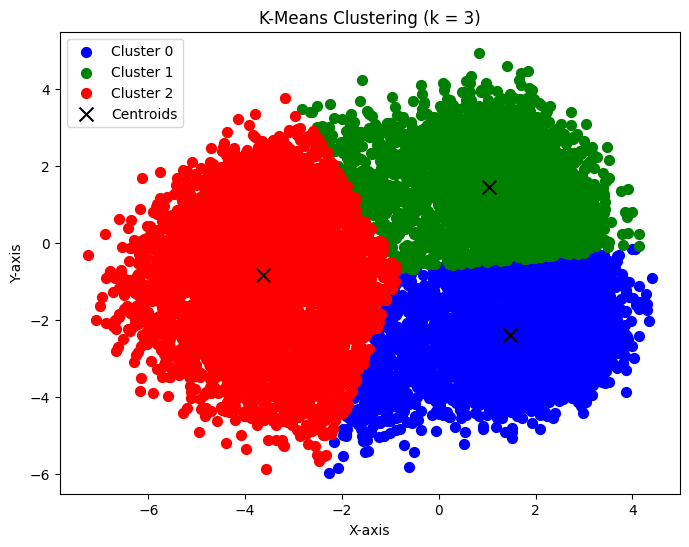

converges
K means 5
Cluster 0: Size = 1747
Cluster 1: Size = 2794
Cluster 2: Size = 1780
Cluster 3: Size = 2322
Cluster 4: Size = 1446


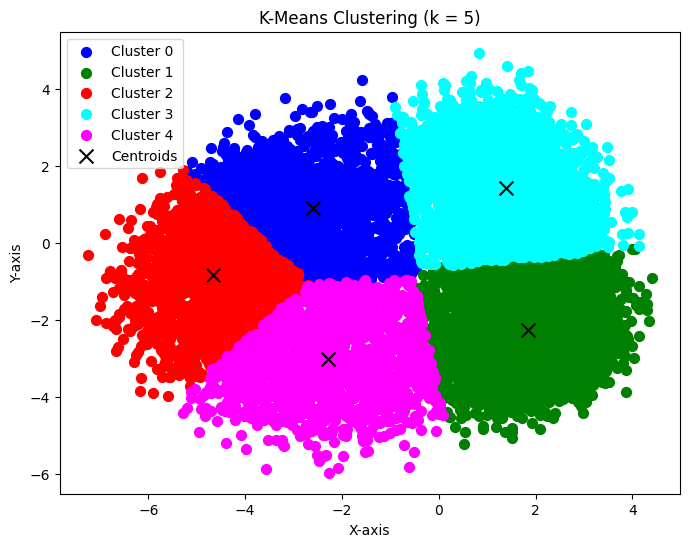

converges
K means 10
Cluster 0: Size = 1265
Cluster 1: Size = 1029
Cluster 2: Size = 887
Cluster 3: Size = 968
Cluster 4: Size = 773
Cluster 5: Size = 912
Cluster 6: Size = 1245
Cluster 7: Size = 834
Cluster 8: Size = 1166
Cluster 9: Size = 1010


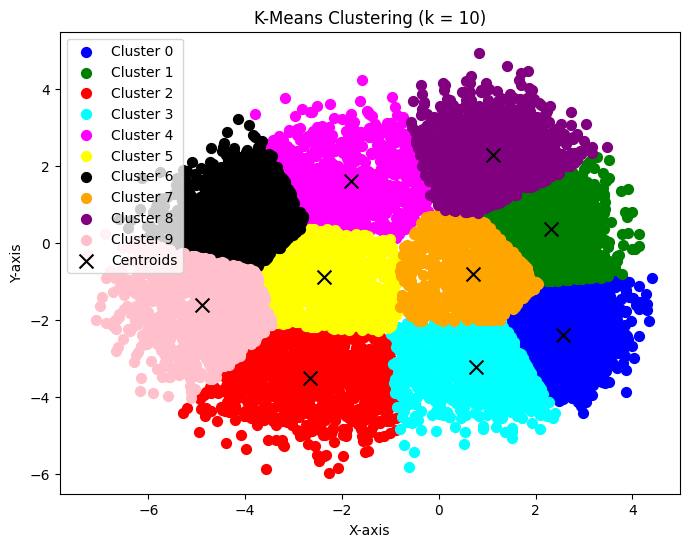

(10089, 5)
converges
K means 2
Cluster 0: Size = 4632
Cluster 1: Size = 5457


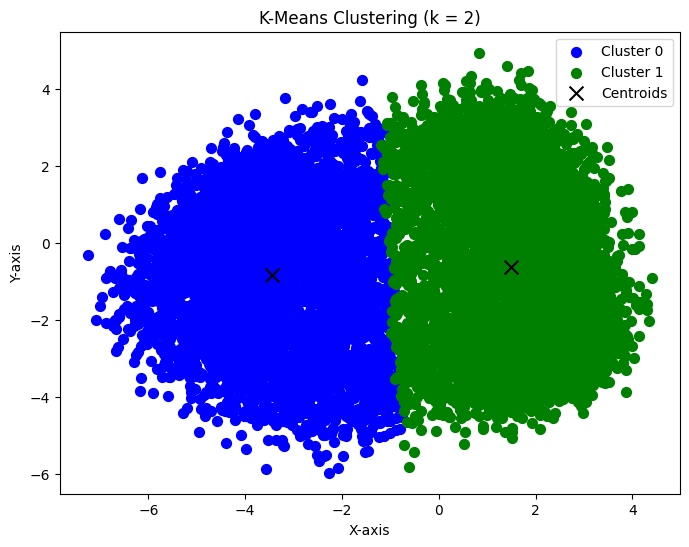

converges
K means 3
Cluster 0: Size = 4503
Cluster 1: Size = 3021
Cluster 2: Size = 2565


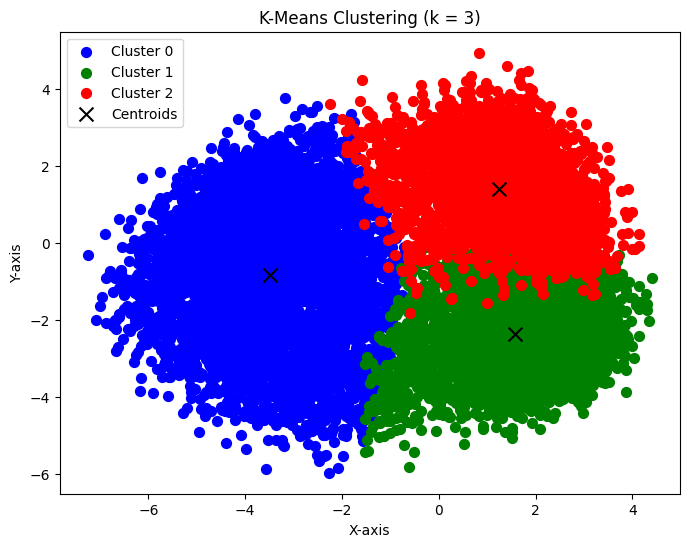

converges
K means 5
Cluster 0: Size = 2115
Cluster 1: Size = 1487
Cluster 2: Size = 2167
Cluster 3: Size = 2005
Cluster 4: Size = 2315


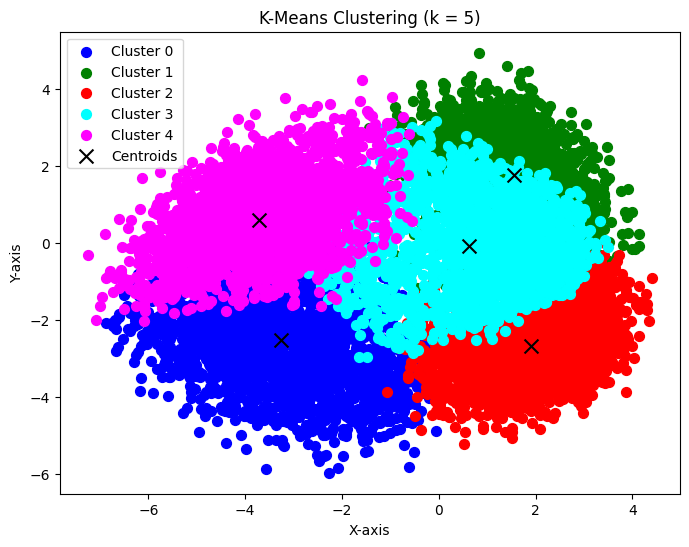

converges
K means 10
Cluster 0: Size = 1107
Cluster 1: Size = 927
Cluster 2: Size = 881
Cluster 3: Size = 820
Cluster 4: Size = 1057
Cluster 5: Size = 1007
Cluster 6: Size = 1203
Cluster 7: Size = 948
Cluster 8: Size = 937
Cluster 9: Size = 1202


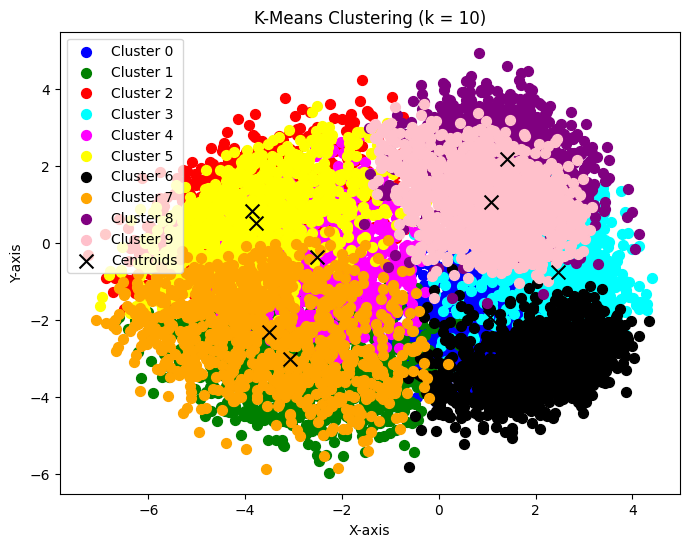

(10089, 10)
converges
K means 2
Cluster 0: Size = 5455
Cluster 1: Size = 4634


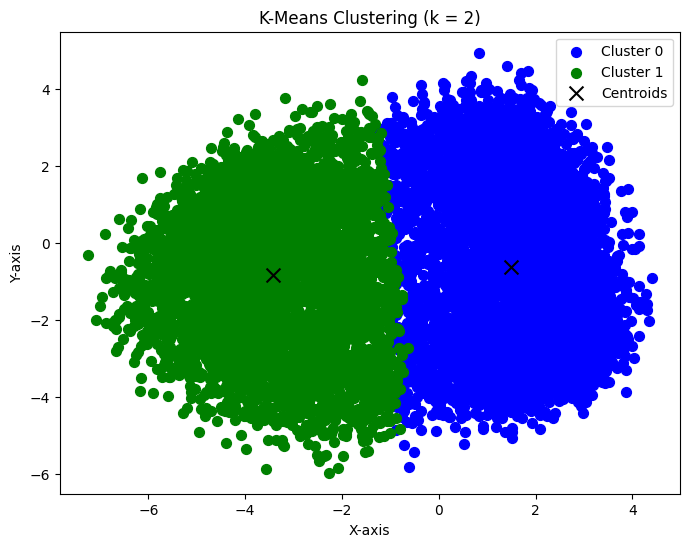

converges
K means 3
Cluster 0: Size = 2124
Cluster 1: Size = 5240
Cluster 2: Size = 2725


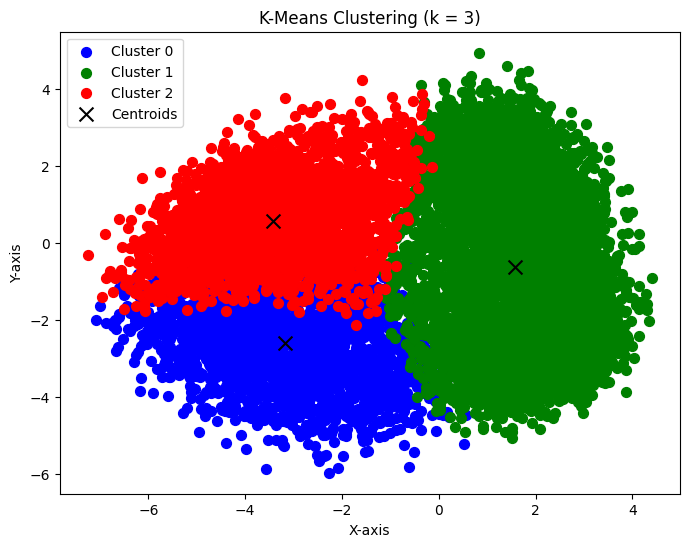

converges
K means 5
Cluster 0: Size = 1918
Cluster 1: Size = 2532
Cluster 2: Size = 1438
Cluster 3: Size = 2120
Cluster 4: Size = 2081


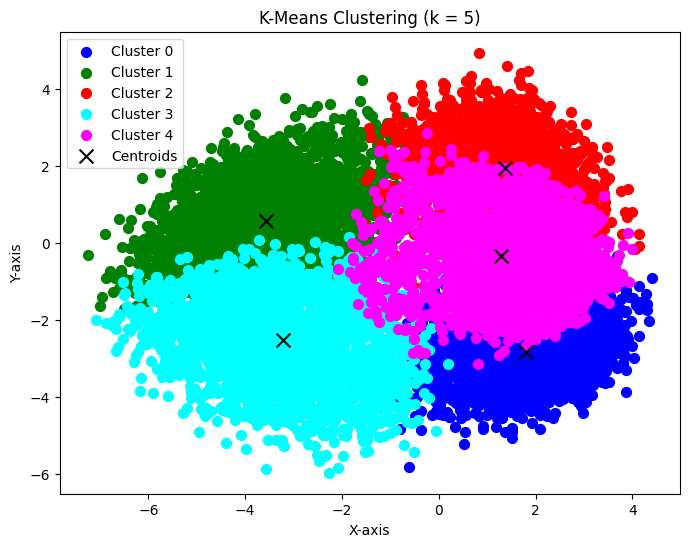

converges
K means 10
Cluster 0: Size = 1159
Cluster 1: Size = 860
Cluster 2: Size = 1155
Cluster 3: Size = 1188
Cluster 4: Size = 751
Cluster 5: Size = 910
Cluster 6: Size = 1106
Cluster 7: Size = 1170
Cluster 8: Size = 922
Cluster 9: Size = 868


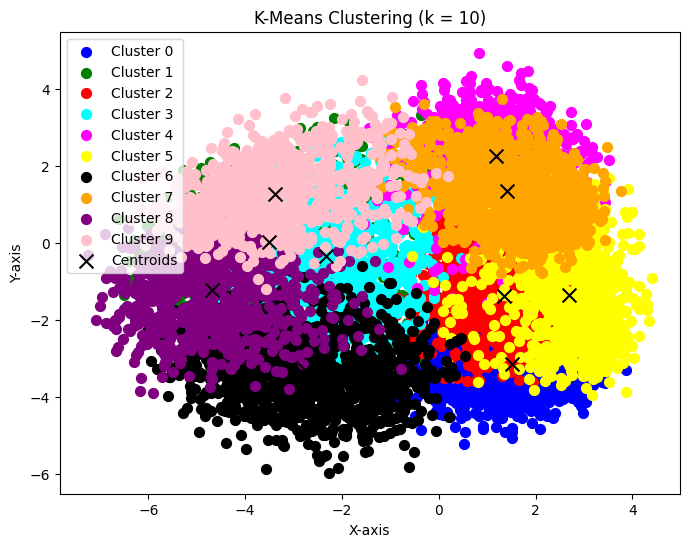

In [11]:
#DEBUG
#Using plot, just for checking

kVal = [2, 3, 5, 10 ]
Dimensions = [2, 5, 10]

for dim in Dimensions:
  reduceX = reduceDim(train_x, dim)
  print(reduceX.shape)

  for k in kVal:

    centroids, labels = kMeans(reduceX, k, 1000)
    print("K means", k)

    plt.figure(figsize=(8, 6))
    plt.title(f"K-Means Clustering (k = {k})")

    for cluster in range(k):
          cluster_size = np.sum(labels == cluster)
          print(f"Cluster {cluster}: Size = {cluster_size}")

          cluster_samples = reduceX[labels == cluster]
          plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], c=colors[cluster], label=f'Cluster {cluster}', s=50)


    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=100, label='Centroids')
    plt.legend()

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you provide a code to filter the MNIST dataset so that we only have the 9 and 3 samples?
2.   Can you compute the kmeans of this filtered dataset without using any specialized library (coding kmeans from scratch) with k=2,3,5,10?
3.   Can you reduce the dimensionality of the filtered dataset to eigenspaces of dimension 2, 5 and 10 instead of 784?
4.   Can you use the kmeans function from scratch and compute it for the new projected datasets using k=2,3,5 and 10?

**Paste the answer provided and run the code below:**

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.decomposition import PCA

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Filter the dataset to include only digits 3 and 9
filtered_train_images = []
filtered_train_labels = []
filtered_test_images = []
filtered_test_labels = []

for i in range(len(train_images)):
    if train_labels[i] == 3 or train_labels[i] == 9:
        filtered_train_images.append(train_images[i])
        filtered_train_labels.append(train_labels[i])

for i in range(len(test_images)):
    if test_labels[i] == 3 or test_labels[i] == 9:
        filtered_test_images.append(test_images[i])
        filtered_test_labels.append(test_labels[i])

# Convert the lists to NumPy arrays
filtered_train_images = np.array(filtered_train_images)
filtered_train_labels = np.array(filtered_train_labels)
filtered_test_images = np.array(filtered_test_images)
filtered_test_labels = np.array(filtered_test_labels)

# Optionally, normalize the pixel values to the range [0, 1]
filtered_train_images = filtered_train_images / 255.0
filtered_test_images = filtered_test_images / 255.0

# Print the shapes of the filtered datasets
print("Filtered Training Images Shape:", filtered_train_images.shape)
print("Filtered Training Labels Shape:", filtered_train_labels.shape)
print("Filtered Test Images Shape:", filtered_test_images.shape)
print("Filtered Test Labels Shape:", filtered_test_labels.shape)


Filtered Training Images Shape: (12080, 28, 28)
Filtered Training Labels Shape: (12080,)
Filtered Test Images Shape: (2019, 28, 28)
Filtered Test Labels Shape: (2019,)


Filtered Training Images Shape: (12080, 28, 28)
Filtered Training Labels Shape: (12080,)
Filtered Test Images Shape: (2019, 28, 28)
Filtered Test Labels Shape: (2019,)
K-Means Clustering (k=2):
Cluster 0 has 6433 samples.
Cluster 1 has 5647 samples.
K-Means Clustering (k=3):
Cluster 0 has 3537 samples.
Cluster 1 has 5482 samples.
Cluster 2 has 3061 samples.
K-Means Clustering (k=5):
Cluster 0 has 2386 samples.
Cluster 1 has 2974 samples.
Cluster 2 has 1639 samples.
Cluster 3 has 2399 samples.
Cluster 4 has 2682 samples.
K-Means Clustering (k=10):
Cluster 0 has 1143 samples.
Cluster 1 has 1212 samples.
Cluster 2 has 978 samples.
Cluster 3 has 1153 samples.
Cluster 4 has 1090 samples.
Cluster 5 has 1476 samples.
Cluster 6 has 1325 samples.
Cluster 7 has 1203 samples.
Cluster 8 has 1295 samples.
Cluster 9 has 1205 samples.
Dimensionality reduction to 2 dimensions:
Reduced dataset shape: (12080, 2)
Dimensionality reduction to 5 dimensions:
Reduced dataset shape: (12080, 5)
Dimensionality r

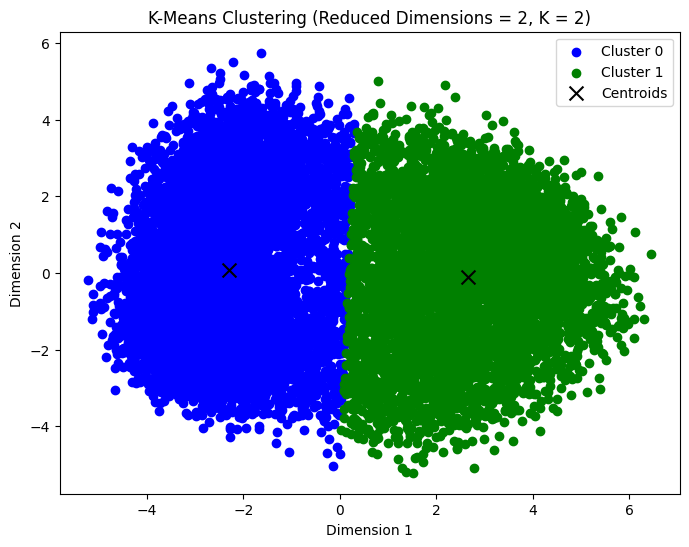

K=3: Cluster Sizes -> [3853 5127 3100]


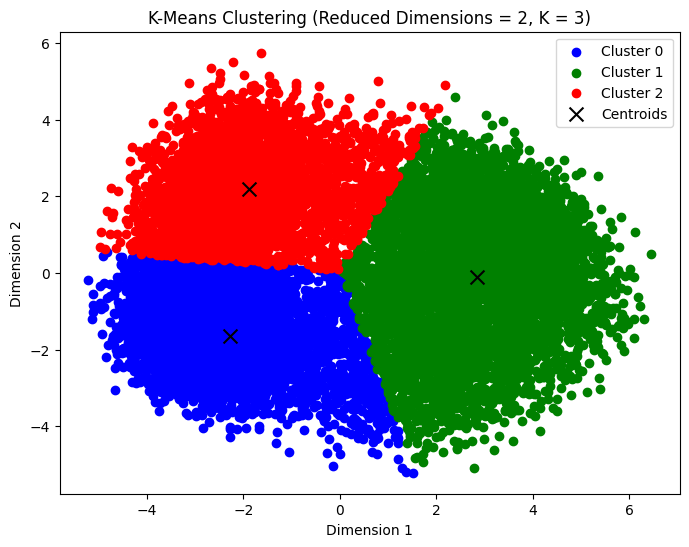

K=5: Cluster Sizes -> [3382 2121 2707 2041 1829]


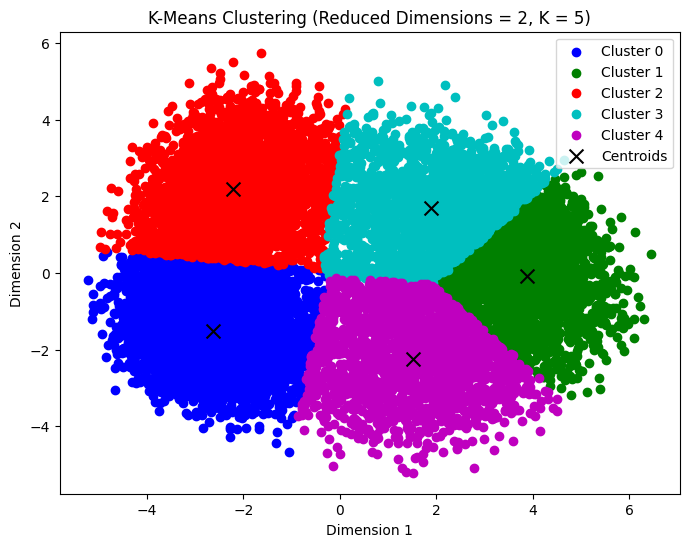

K=10: Cluster Sizes -> [1506 1434 1285  987 1123 1385 1083 1096  964 1217]


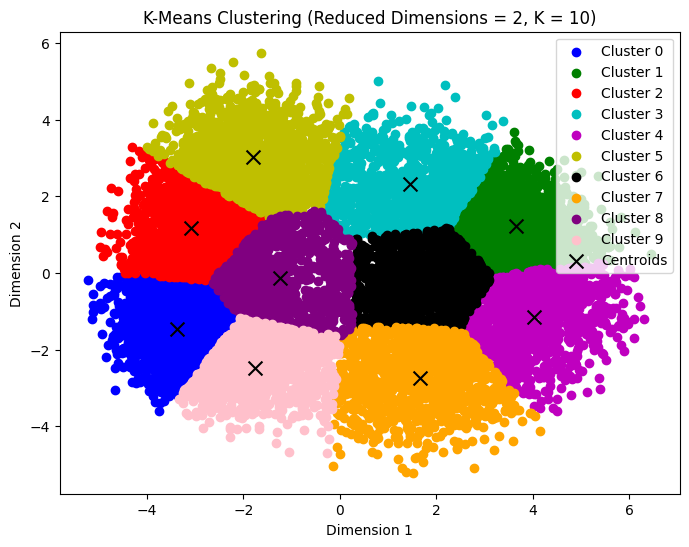

K-Means Clustering (Reduced Dimensions = 5):
K=2: Cluster Sizes -> [6463 5617]


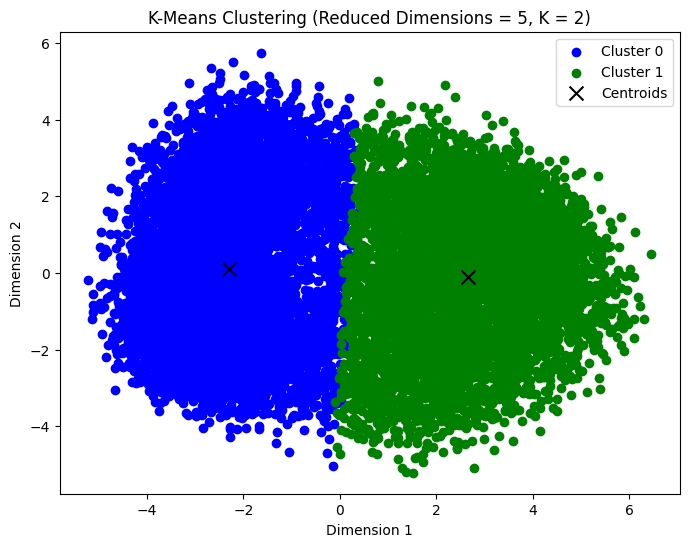

K=3: Cluster Sizes -> [3599 5476 3005]


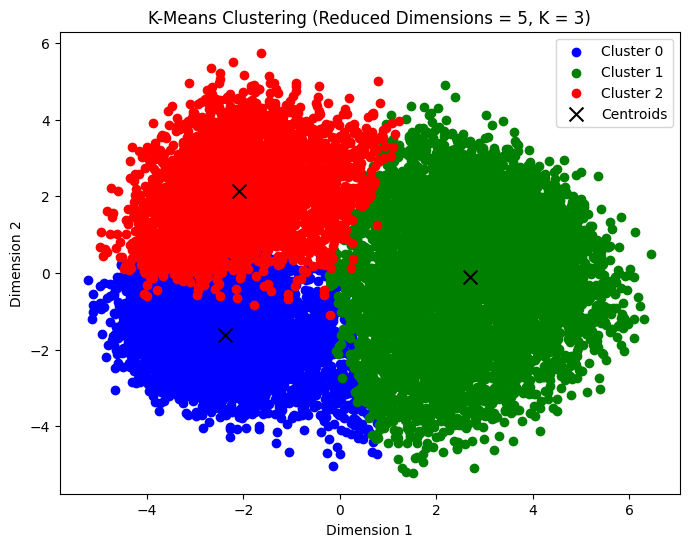

K=5: Cluster Sizes -> [2600 2736 1793 2328 2623]


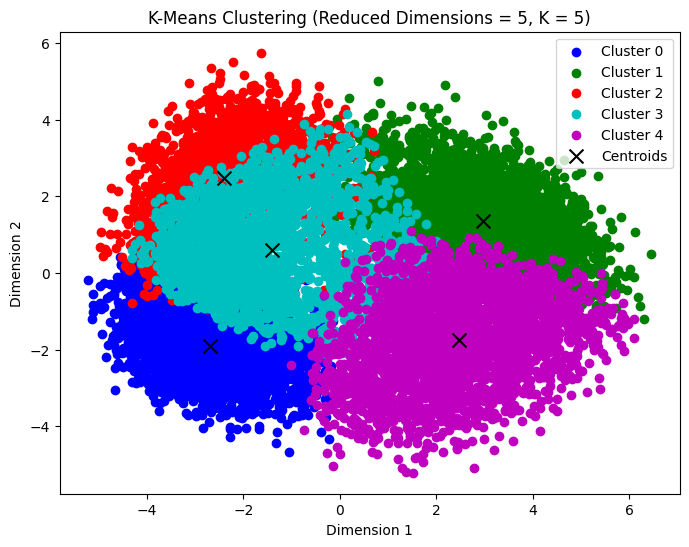

K=10: Cluster Sizes -> [1021 1156 1135 1268  955 1407 1265 1169 1336 1368]


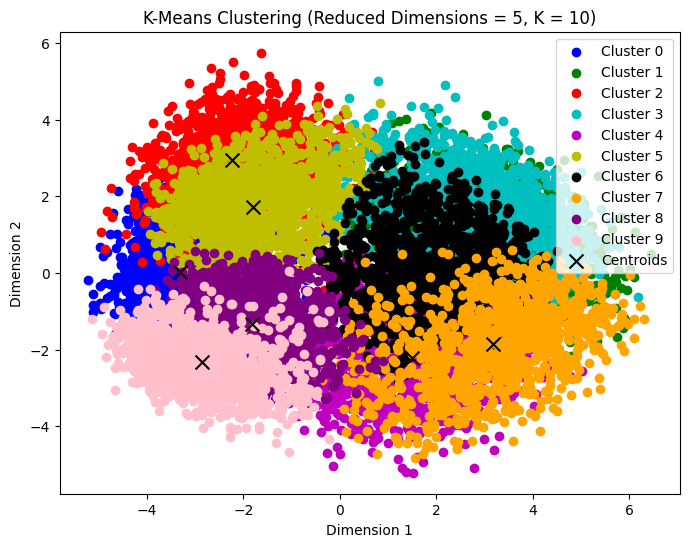

K-Means Clustering (Reduced Dimensions = 10):
K=2: Cluster Sizes -> [6462 5618]


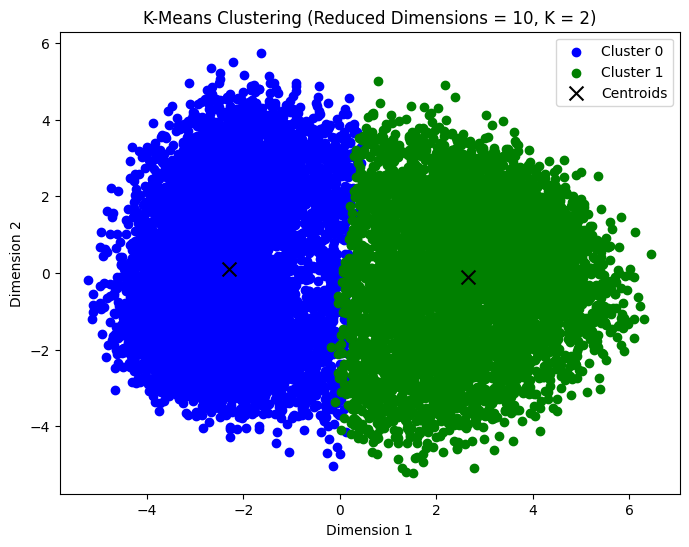

K=3: Cluster Sizes -> [3588 5455 3037]


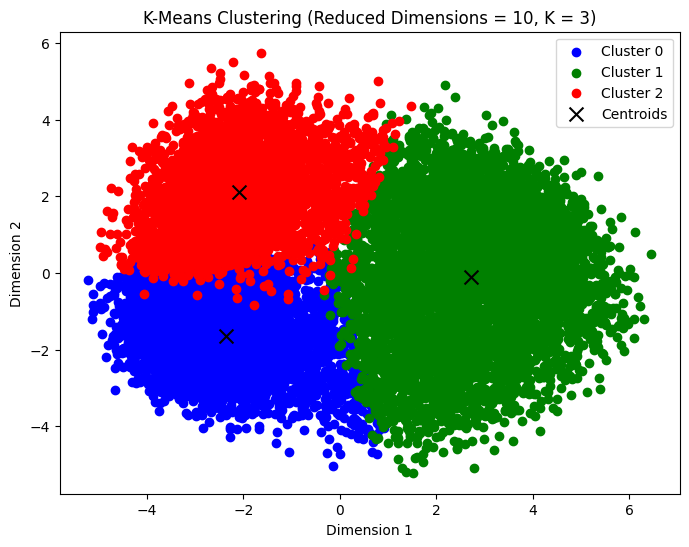

K=5: Cluster Sizes -> [2264 2955 1713 2464 2684]


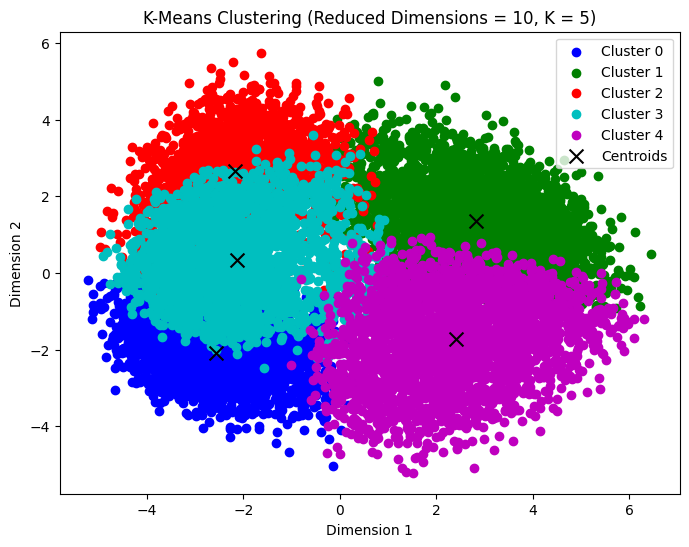

K=10: Cluster Sizes -> [1139 1056  892 1152 1092 1388 1339 1249 1370 1403]


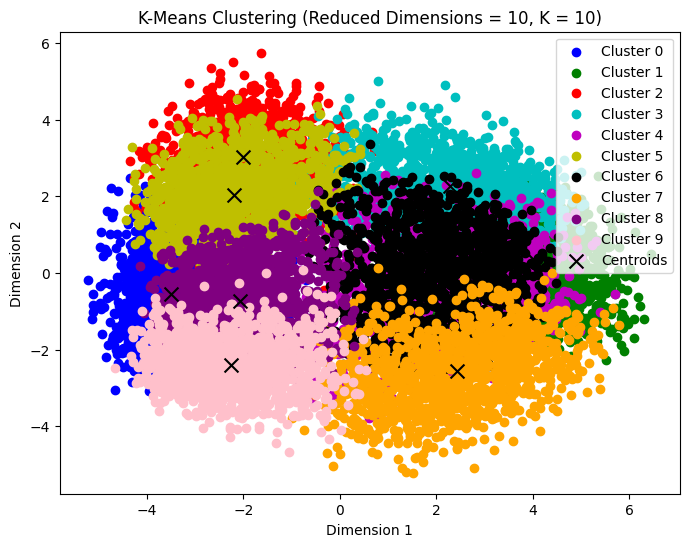

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.decomposition import PCA

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Filter the dataset to include only digits 3 and 9
filtered_train_images = []
filtered_train_labels = []
filtered_test_images = []
filtered_test_labels = []

for i in range(len(train_images)):
    if train_labels[i] == 3 or train_labels[i] == 9:
        filtered_train_images.append(train_images[i])
        filtered_train_labels.append(train_labels[i])

for i in range(len(test_images)):
    if test_labels[i] == 3 or test_labels[i] == 9:
        filtered_test_images.append(test_images[i])
        filtered_test_labels.append(test_labels[i])

# Convert the lists to NumPy arrays
filtered_train_images = np.array(filtered_train_images)
filtered_train_labels = np.array(filtered_train_labels)
filtered_test_images = np.array(filtered_test_images)
filtered_test_labels = np.array(filtered_test_labels)

# Optionally, normalize the pixel values to the range [0, 1]
filtered_train_images = filtered_train_images / 255.0
filtered_test_images = filtered_test_images / 255.0

# Print the shapes of the filtered datasets
print("Filtered Training Images Shape:", filtered_train_images.shape)
print("Filtered Training Labels Shape:", filtered_train_labels.shape)
print("Filtered Test Images Shape:", filtered_test_images.shape)
print("Filtered Test Labels Shape:", filtered_test_labels.shape)

def kmeans(X, k, max_iters=100):
    # Initialize centroids randomly
    np.random.seed(0)
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids as the mean of the assigned data points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # If centroids have not changed significantly, break
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Reshape the filtered dataset for k-means (flatten images)
filtered_train_images_flat = filtered_train_images.reshape(filtered_train_images.shape[0], -1)

# Perform k-means clustering for k=2, 3, 5, and 10
k_values = [2, 3, 5, 10]
for k in k_values:
    labels, centroids = kmeans(filtered_train_images_flat, k)
    print(f"K-Means Clustering (k={k}):")
    for cluster_id in range(k):
        cluster_samples = filtered_train_images[labels == cluster_id]
        print(f"Cluster {cluster_id} has {len(cluster_samples)} samples.")

# Reshape the filtered training dataset for PCA
filtered_train_images_flat = filtered_train_images.reshape(filtered_train_images.shape[0], -1)

# Perform PCA to reduce dimensionality
dimensions = [2, 5, 10]
reduced_datasets = []

for n_components in dimensions:
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(filtered_train_images_flat)
    reduced_datasets.append(reduced_data)

# Print the shape of reduced datasets
for n_components, reduced_data in zip(dimensions, reduced_datasets):
    print(f"Dimensionality reduction to {n_components} dimensions:")
    print("Reduced dataset shape:", reduced_data.shape)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Reducing dimensionality to 2, 5, and 10 dimensions
dimensions = [2, 5, 10]
reduced_datasets = []

for n_components in dimensions:
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(filtered_train_images_flat)
    reduced_datasets.append(reduced_data)

# Perform k-means clustering for k=2, 3, 5, and 10 on the reduced datasets
k_values = [2, 3, 5, 10]

for n_components, reduced_data in zip(dimensions, reduced_datasets):
    print(f"K-Means Clustering (Reduced Dimensions = {n_components}):")
    for k in k_values:
        labels, centroids = kmeans(reduced_data, k)
        print(f"K={k}: Cluster Sizes -> {np.bincount(labels)}")
        plt.figure(figsize=(8, 6))
        plt.title(f"K-Means Clustering (Reduced Dimensions = {n_components}, K = {k})")

        for cluster_id in range(k):
            cluster_samples = reduced_data[labels == cluster_id]
            plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], c=colors[cluster_id], label=f'Cluster {cluster_id}')

        plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=100, label='Centroids')
        plt.legend()
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')
        plt.show()


# Report



1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)
2.   Ask ChatGPT how can you judge if a cluster is correctly computed. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
3.   Ask ChatGPT how can we know which k is the correct parameter for a kMeans algorithm. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
4.   Conclude with some thoughts and things you learned from this homework.

Machine Learning HW 5
21900628
Sechang Jang


**What are some differences you notice between your code and ChatGPT's? (Name at least 3)**
1.	Using Dataset is different. I am using the MNIST dataset from 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'. However, ChatGPT extracts the MNIST dataset using tensorflow keras dataset. Because the dataset is different, the number of filter datasets is different. My code filtered out 10089 MNIST data, but ChatGPT code filtered out 12080 MNIST data.
2.	The method to reduce dimensionality is different. ChatGPT’s code uses PCA to reduce the dimensionality to certain eigenspace. Uses PCA and fit methods automatically reduce the dataset into certain eigenspace. Instead, I used numpy mostly. Using np.linalg, I extracted the eigenvalue and eigenvector, reshaped them, and projected them to a certain space.
3.	On the calculating K-means, my code uses dataset shape to assign the random centroid, but ChatGPT code uses range of the length of the dataset. Also, ChatGPT’s code uses some methods to process the images because of dataset differences. Such as normalizing the pixel values.

**Ask ChatGPT how can you judge if a cluster is correctly computed. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
Evaluating the quality of clusters in unsupervised learning, such as k-means clustering, is a challenging task because there are no ground-truth labels to compare against. However, there are several techniques and metrics that can help you judge the quality of clusters:**

Inertia (Within-Cluster Sum of Squares): Inertia measures the sum of squared distances of samples to their closest cluster center. A lower inertia indicates that the data points are closer to their cluster centers, which is generally desirable. However, it can be misleading when clusters have different sizes or densities.

Silhouette Score: The silhouette score measures how similar an object is to its own cluster compared to other clusters. A high silhouette score suggests that the object is well matched to its own cluster and poorly matched to neighboring clusters. A value close to 1 is ideal. It is a good metric for understanding the quality of clusters.

Davies-Bouldin Index: This index measures the average similarity between each cluster and its most similar cluster. A lower Davies-Bouldin index indicates better clustering. It can be used to compare different clusterings, but it's sensitive to outliers.

Calinski-Harabasz Index (Variance Ratio Criterion): This index computes the ratio of the between-cluster dispersion to within-cluster dispersion. A higher Calinski-Harabasz score suggests better-defined clusters.

Visual Inspection: Sometimes, you can judge the quality of clusters through visual inspection by plotting the data points and cluster centers in 2D or 3D space. If the clusters appear well-separated and compact, it's a good sign.
Domain Knowledge: Depending on the problem and dataset, you may have domain-specific criteria to judge the quality of clusters. Domain experts might be able to provide valuable insights.

Cross-Validation: You can split your data into training and validation sets, perform k-means clustering on the training data, and then evaluate how well the clusters generalize to the validation set. This can help assess the stability of the clusters.

Interpretability: The interpretability of the resulting clusters is essential. If the clusters have clear and meaningful interpretations, it's an indication of good clustering.

Comparative Evaluation: Compare the clustering results to different values of k. A good choice for k should yield meaningful clusters that are distinct from each other. Look for stability in results as k varies.

Remember that different metrics and techniques may provide different insights, and there is no one-size-fits-all approach. It's often necessary to use a combination of these methods to get a comprehensive understanding of the quality of the clusters. Additionally, it's important to consider the specific goals of your analysis and the nature of the data when evaluating clustering results.

**My answer**: ChatGPT’s first answer is about the metrics to measure the distance or similarity of the clusters. These metrics will be helpful in seeing how the clusters are clustered well. If other clusters are similar or the distance of samples to centroids isn’t that big, it is a well-defined cluster. I think it is true, too. However, I am interested in following the answers more. Since the kMeans algorithm is sensitive to outliers, centroid initialization, and distance measurements. Therefore, as ChatGPT mentioned, Domain Knowledge about the dataset will help to decide which distance measurements are going to be used. Also, comparative evaluation is also essential to see if the cluster is correctly computed as ChatGPT’s explain. Metrics will be a great tool to decide what cluster is the best, not mainly how clusters are correctly computed.

**Ask ChatGPT how can we know which k is the correct parameter for a kMeans algorithm. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?**

Determining the correct value of k (the number of clusters) for a k-means algorithm is a fundamental challenge in unsupervised machine learning. There are several methods and approaches you can use to find the optimal k for your specific dataset. Here are some common techniques:

Elbow Method: The elbow method involves running k-means clustering for a range of k values (e.g., from 1 to 10) and plotting the sum of squared distances (inertia) from each point to its assigned cluster center. The idea is that the point where the reduction in inertia begins to slow down (forming an "elbow" in the plot) can be considered a good estimate for the optimal k. However, this method is somewhat subjective, and the "elbow" is not always clear.

Silhouette Score: The silhouette score measures how similar an object is to its own cluster compared to other clusters. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. You can compute the silhouette score for different values of k and choose the k with the highest score.

Gap Statistics: Gap statistics compare the performance of your k-means model to the performance of a random clustering. If the gap statistic is significantly better for a certain k, it suggests that this value is a good choice.
Davies-Bouldin Index: This index measures the average similarity between each cluster and its most similar cluster. Lower values of the index indicate better clustering.

Calinski-Harabasz Index (Variance Ratio Criterion): This index computes the ratio of the between-cluster dispersion to the within-cluster dispersion. A higher Calinski-Harabasz score suggests better-defined clusters.
Silhouette Diagram: Visualizing silhouette scores for different values of k in a silhouette diagram can help you choose an appropriate k.

Domain Knowledge: In some cases, domain knowledge or prior information about the problem can help guide the selection of k. If you have insights into the number of natural clusters in your data, that can be valuable.

Comparative Evaluation: You can compare the quality of clusters for different values of k visually or using metrics. Look for solutions that make intuitive sense and have distinct and well-defined clusters.

It's important to remember that there is no one-size-fits-all method for choosing k. The choice of k often involves a combination of these techniques and some degree of subjectivity. Moreover, the quality of the clustering is also dependent on the specific dataset and the goals of your analysis. Therefore, while automated methods can provide guidance, they should be considered in conjunction with the context of the problem and the nature of the data.

**My answer:** ChatGPT’s answered some method or metric that we can use to choose appropriate parameters for kMeans algorithm. All metrics or methods are based on the iterative step. Since kMeans algorithm’s result could be different because of outliers or centroids initialization, we can’t define good results in one experiment. Similarly, finding the good parameter k needs multiple experiments. All methods or metrics could be used in these iterative steps. Also, domain knowledge will be helpful in reducing the tries. Comparative evaluation will be the key.

**Conclude with some thoughts and things you learned from this homework.**

kMean algorithm is unsupervised learning. Unsupervised learning does not require training data labeling. The most annoying job in supervised learning would be processing the data with labels. I could see its benefit. However, we could not ignore the results could be various because of outliers.
It was interesting to see how reducing dimensions can compute algorithms efficiently, trying to preserve the information it has.
